<a href="https://colab.research.google.com/github/anilsah895/Association-mining-via-Apriori-algorithm-implemetation/blob/master/plot_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Confusion matrix


Example of confusion matrix usage to evaluate the quality
of the output of a classifier on the iris data set. The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without
normalization by class support size (number of elements
in each class). This kind of normalization can be
interesting in case of class imbalance to have a more
visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our
choice for the regularization parameter C was not the best.
In real life applications this parameter is usually chosen
using `grid_search`.




In [0]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Base_dir="gdrive/My Drive/Skin_Data1/"#content/gdrive/My Drive/Colab Notebooks/Skin_Data1
train_path = Base_dir+"train"
validation_path = Base_dir+"validation"

In [0]:
from keras import models

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
# Change the batchsize according to your system RAM
train_batchsize = 64
val_batchsize = 32
 
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(150, 150),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=(150, 150),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 4400 images belonging to 10 classes.
Found 1100 images belonging to 10 classes.


In [0]:
%matplotlib inline

Automatically created module for IPython interactive environment
Confusion Matrix
[[ 82   0   3   4   1   0   5   7   6   2]
 [  2  64   1  14  10   2   0   8   0   9]
 [  0   0 101   0   1   8   0   0   0   0]
 [  8   3   3  75   1   0   3  14   3   0]
 [  0   1  11   1  86   0   5   1   2   3]
 [  0   0  12   1   0  88   1   3   4   1]
 [  1   1   0   2   1   1  98   3   3   0]
 [  4   3   1   3   6   0  11  76   5   1]
 [  3   4   2   4   5   2   3   5  81   1]
 [  4   5   6   3  18   1   2   2   7  62]]
Classification Report
                                             precision    recall  f1-score   support

                               Acne-Rosacea       0.79      0.75      0.77       110
                       Basal cell carcinoma       0.79      0.58      0.67       110
 Hair Loss Alopecia and other Hair Diseases       0.72      0.92      0.81       110
                                     Herpes       0.70      0.68      0.69       110
        Melanoma Skin Cancer Nevi and M

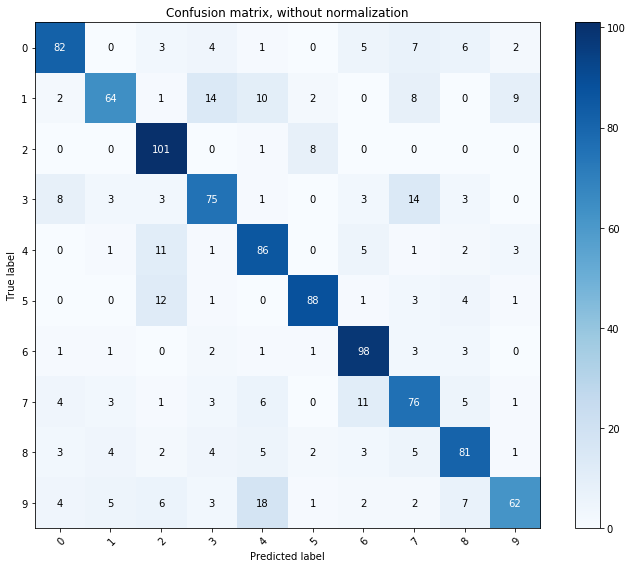

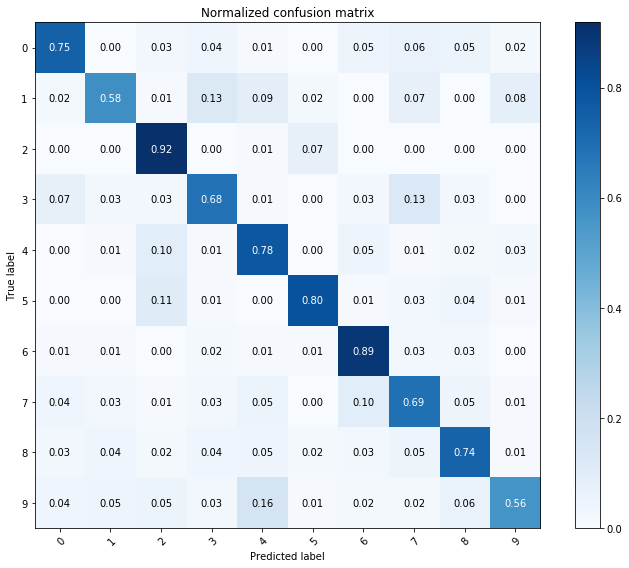

In [58]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with


from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model
model1 = load_model(Base_dir+'beforefinetune_skin_net0100.hdf5')
validation_generator.reset()
Y_pred = model1.predict_generator(validation_generator, validation_generator.samples//validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ["Acne-Rosacea", "Basal cell carcinoma"," Hair Loss Alopecia and other Hair Diseases",
             " Herpes"," Melanoma Skin Cancer Nevi and Moles",
            " Nail Fungus and other Nail Disease" , "Urticaria Hives"," Vasculitis"," Warts","seborrheic-keratoses"]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, target_names,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
   
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(validation_generator.classes, y_pred)
    # Only use the labels that appear in the data
    target_names =[0,1,2,3,4,5,6,7,8,9]
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=target_names, yticklabels=target_names,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(validation_generator.classes, y_pred,
                      title='Confusion matrix, without normalization')
plt.savefig(Base_dir+"Confusion matrix, without normalization.png", bbox_inches='tight')
# Plot normalized confusion matrix
plot_confusion_matrix(validation_generator.classes, y_pred,target_names,
                      title='Normalized confusion matrix')
plt.savefig(Base_dir+"Normalized confusion matrix.png", bbox_inches='tight')
#plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))



Automatically created module for IPython interactive environment
Confusion Matrix
[[86  0  3  5  1  0  4  6  3  2]
 [ 3 74  0 13  7  3  0  2  2  6]
 [ 1  0 94  0  1 12  0  0  2  0]
 [ 6  3  1 82  1  0  3  9  5  0]
 [ 1  1  5  0 87  3  2  2  4  5]
 [ 0  0 11  1  0 90  0  4  4  0]
 [ 1  1  0  2  2  0 97  4  3  0]
 [ 5  2  0  9  5  1  9 73  5  1]
 [ 3  3  1  6  6  2  0  1 88  0]
 [ 3  7  6  6 16  1  0  1 10 60]]
Classification Report
                                             precision    recall  f1-score   support

                               Acne-Rosacea       0.79      0.78      0.79       110
                       Basal cell carcinoma       0.81      0.67      0.74       110
 Hair Loss Alopecia and other Hair Diseases       0.78      0.85      0.81       110
                                     Herpes       0.66      0.75      0.70       110
        Melanoma Skin Cancer Nevi and Moles       0.69      0.79      0.74       110
         Nail Fungus and other Nail Disease       0.80

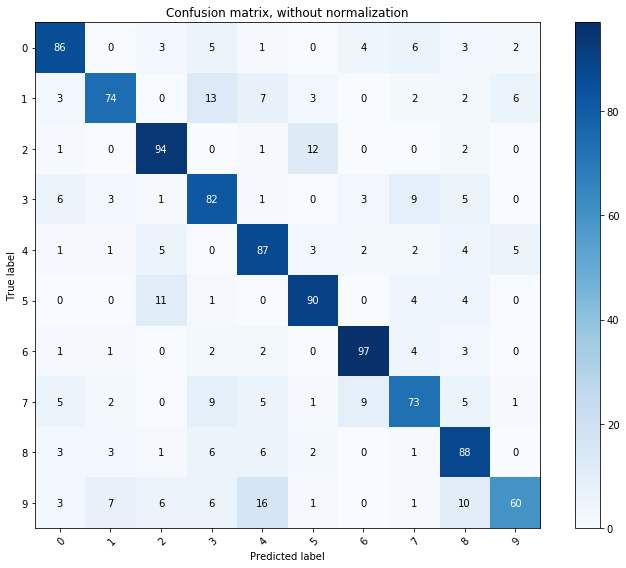

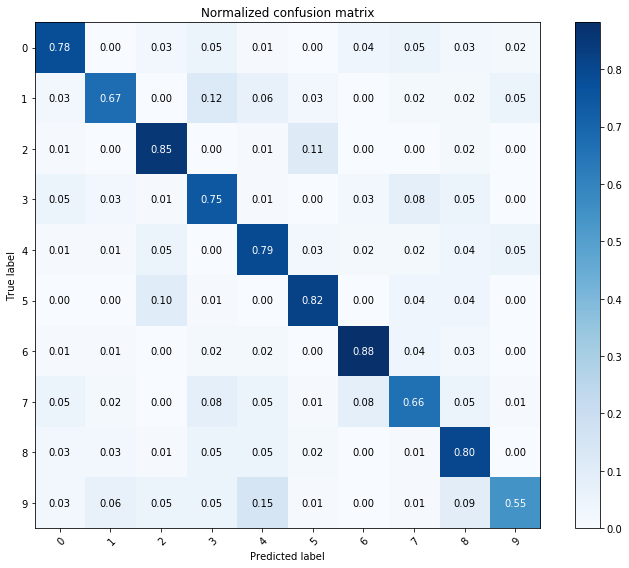

In [59]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with


from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model
model1 = load_model(Base_dir+'skin_net_after_fineTuningAF.hdf5')
validation_generator.reset()
Y_pred = model1.predict_generator(validation_generator, validation_generator.samples//validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ["Acne-Rosacea", "Basal cell carcinoma"," Hair Loss Alopecia and other Hair Diseases",
             " Herpes"," Melanoma Skin Cancer Nevi and Moles",
            " Nail Fungus and other Nail Disease" , "Urticaria Hives"," Vasculitis"," Warts","seborrheic-keratoses"]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, target_names,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
   
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(validation_generator.classes, y_pred)
    # Only use the labels that appear in the data
    target_names =[0,1,2,3,4,5,6,7,8,9]
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=target_names, yticklabels=target_names,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(validation_generator.classes, y_pred,
                      title='Confusion matrix, without normalization')
plt.savefig(Base_dir+"AFConfusion matrix, without normalization.png", bbox_inches='tight')
# Plot normalized confusion matrix
plot_confusion_matrix(validation_generator.classes, y_pred,target_names,
                      title='Normalized confusion matrix')
plt.savefig(Base_dir+"AFNormalized confusion matrix.png", bbox_inches='tight')
#plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

